<a href="https://colab.research.google.com/github/bandiamithsreenivasareddy/ml-lab/blob/main/lab5ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Single Feature - Train Set Metrics:
MSE: 2.2228, RMSE: 1.4909, MAPE: 0.6825, R2 Score: 0.1297

Single Feature - Test Set Metrics:
MSE: 2.3718, RMSE: 1.5400, MAPE: 0.6955, R2 Score: 0.0453

Multiple Features - Train Set Metrics:
MSE: 0.2747, RMSE: 0.5242, MAPE: 0.2237, R2 Score: 0.8924

Multiple Features - Test Set Metrics:
MSE: 0.4201, RMSE: 0.6482, MAPE: 0.2389, R2 Score: 0.8309

K = 2: Silhouette Score = 0.4995, CH Score = 608.7942, DB Index = 0.6974
K = 3: Silhouette Score = 0.4128, CH Score = 604.5768, DB Index = 0.7923
K = 4: Silhouette Score = 0.3251, CH Score = 537.0113, DB Index = 0.9412
K = 5: Silhouette Score = 0.3024, CH Score = 488.6371, DB Index = 0.9745
K = 6: Silhouette Score = 0.3016, CH Score = 444.2337, DB Index = 1.1592
K = 7: Silhouette Score = 0.2855, CH Score = 433.2558, DB Index = 1.0856
K = 8: Silhouette Score = 0.2711, CH Score = 400.6830, DB Index = 1.1879
K = 9: Silhouette Score = 0.2819, CH Score = 375.3076, DB Index = 1.1998
K = 10: Silhouette Score = 0.273

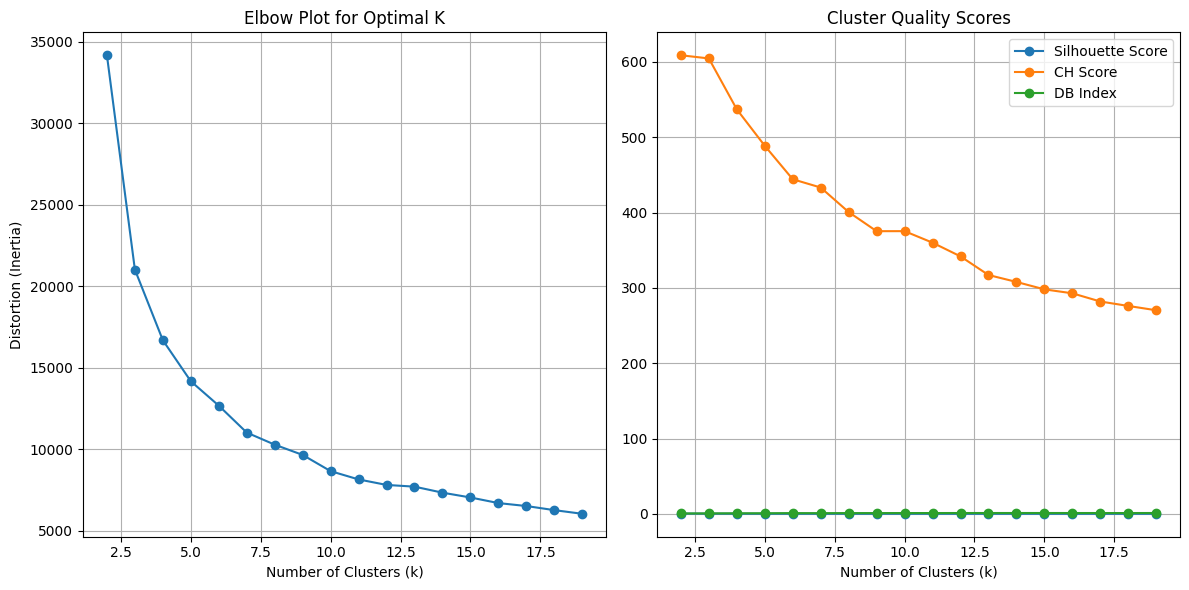

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data"
dataset = pd.read_csv(url, header=None, na_values='?').dropna()
dataset.columns = [f'feature_{i}' for i in range(dataset.shape[1] - 1)] + ['target']

# Splitting data
X = dataset.drop('target', axis=1)
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression Model (Single Feature)
reg_single = LinearRegression().fit(X_train.iloc[:, [0]], y_train)
y_train_pred_single = reg_single.predict(X_train.iloc[:, [0]])
y_test_pred_single = reg_single.predict(X_test.iloc[:, [0]])

# Regression Model (Multiple Features)
reg_multi = LinearRegression().fit(X_train, y_train)
y_train_pred_multi = reg_multi.predict(X_train)
y_test_pred_multi = reg_multi.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_true, y_pred, dataset_type="Train", model_type="Single Feature"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_type} - {dataset_type} Set Metrics:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.4f}, R2 Score: {r2:.4f}\n")

evaluate_model(y_train, y_train_pred_single, "Train", "Single Feature")
evaluate_model(y_test, y_test_pred_single, "Test", "Single Feature")
evaluate_model(y_train, y_train_pred_multi, "Train", "Multiple Features")
evaluate_model(y_test, y_test_pred_multi, "Test", "Multiple Features")

# KMeans Clustering
def perform_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    ch_score = calinski_harabasz_score(X, kmeans.labels_)
    db_score = davies_bouldin_score(X, kmeans.labels_)
    print(f"K = {k}: Silhouette Score = {sil_score:.4f}, CH Score = {ch_score:.4f}, DB Index = {db_score:.4f}")
    return sil_score, ch_score, db_score, kmeans.inertia_

# Optimal K using Elbow Plot
distortions = []
sil_scores = []
ch_scores = []
db_scores = []
k_values = range(2, 20)
for k in k_values:
    sil, ch, db, inertia = perform_kmeans(X, k)
    distortions.append(inertia)
    sil_scores.append(sil)
    ch_scores.append(ch)
    db_scores.append(db)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, distortions, marker='o')
plt.title('Elbow Plot for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, label='Silhouette Score', marker='o')
plt.plot(k_values, ch_scores, label='CH Score', marker='o')
plt.plot(k_values, db_scores, label='DB Index', marker='o')
plt.title('Cluster Quality Scores')
plt.xlabel('Number of Clusters (k)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
print("Dataset Head:\n", dataset.head(10))

Dataset Head:
    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          2          2          0          3          0          0   
1          3          3          3          2          1          0   
2          2          1          2          3          1          3   
3          2          2          2          0          0          0   
4          2          3          2          2          2          2   
5          2          3          2          0          0          0   
6          2          1          0          2          0          0   
7          2          2          3          3          3          3   
8          2          2          1          0          2          0   
9          2          2          1          0          1          0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_25  feature_26  \
0          0          0          1          0  ...           0           0   
1          0          0          1          1  